In [1]:
# 分类器
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import joblib

In [10]:
doc_topic = np.load('./ENdata/topic14/doc_topic_1.npy')
model = joblib.load('./kmeansModel/EN14/14.model')
result = model.predict(doc_topic)

# 定义特征和目标
X = doc_topic
y = result
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 创建SVM分类器
clf = svm.SVC(kernel='rbf', probability=True)  # 这里使用线性核函数，你也可以选择其他的核函数，如 'linear', 'poly', 'rbf', 'sigmoid'等。
# 训练模型
clf.fit(X_train, y_train)
joblib.dump(clf, './classifyModel/EN/rbf.model')
# 预测测试集
y_pred = clf.predict(X_test)
# print(clf.predict_proba(X_test))
# 计算准确率
print("Accuracy:", accuracy_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred, average='macro'))
print("f1_score:", f1_score(y_test, y_pred, average='macro'))
# 混淆矩阵
confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.9561343385880741
recall: 0.9478584878257593
f1_score: 0.9519535089829668


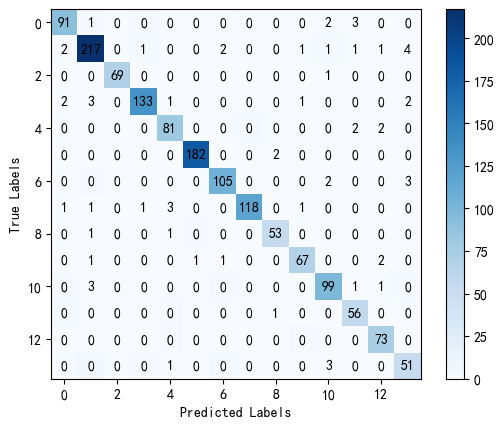

In [11]:
# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion, cmap=plt.cm.Blues)
# label 坐标轴标签说明
indices = range(len(confusion))
plt.colorbar()
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
# plt.rcParams两行是用于解决标签不能显示汉字的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 显示数据
for first_index in range(len(confusion)):  # 第几行
    for second_index in range(len(confusion[first_index])):  # 第几列
        plt.text(first_index, second_index, confusion[first_index][second_index], ha='center', va='center')
# 显示
plt.savefig('./ENdata/topic14/混淆矩阵rbf')
plt.show()

In [12]:
matrix = clf.predict_proba(doc_topic)
maxPro = np.max(matrix, axis=1)
maxPro.shape
np.mean(maxPro)

0.9381829593764962

In [36]:
maxPro = [item<=0.5 for item in maxPro]
np.sum(maxPro)

45